In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
%matplotlib inline
import sys
sys.path.append('/home/tomek/ib_tools')

In [2]:
from datastore_pytables import Store

In [3]:
store = Store()

In [4]:
store.keys()

['/cont/min/CL_20191120_NYMEX_USD',
 '/cont/min/CL_20200320_NYMEX_USD',
 '/cont/min/ES_20191220_GLOBEX_USD',
 '/cont/min/ES_20200320_GLOBEX_USD',
 '/cont/min/GC_20191227_NYMEX_USD',
 '/cont/min/GC_20200428_NYMEX_USD',
 '/cont/min/GE_20191216_GLOBEX_USD',
 '/cont/min/NKD_20191212_GLOBEX_USD',
 '/cont/min/NQ_20191220_GLOBEX_USD',
 '/cont/min/NQ_20200320_GLOBEX_USD',
 '/cont/min/YM_20191220_ECBOT_USD',
 '/cont/min/ZB_20191219_ECBOT_USD',
 '/cont/min/ZF_20191231_ECBOT_USD',
 '/cont/min/ZN_20191219_ECBOT_USD']

In [5]:
keys = dict((('gc', '/cont/min/GC_20200428_NYMEX_USD'),
('nq', '/cont/min/NQ_20200320_GLOBEX_USD'),
('es', '/cont/min/ES_20200320_GLOBEX_USD'),
('cl','/cont/min/CL_20200320_NYMEX_USD')))

In [6]:
data = {key: store.read(string).sort_index(ascending=True) for key, string in keys.items()}

In [7]:
data['gc']

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-10-28 19:50:00,1303.0,1303.0,1303.0,1303.0,1,1303.00,1
2016-10-28 19:51:00,1303.0,1303.0,1303.0,1303.0,0,1303.00,0
2016-10-28 19:52:00,1303.0,1303.0,1303.0,1303.0,0,1303.00,0
2016-10-28 19:53:00,1303.0,1303.0,1303.0,1303.0,0,1303.00,0
2016-10-28 19:54:00,1303.0,1303.0,1303.0,1303.0,0,1303.00,0
...,...,...,...,...,...,...,...
2020-02-19 13:12:00,1611.8,1611.8,1611.6,1611.8,80,1611.75,47
2020-02-19 13:13:00,1611.8,1612.2,1611.8,1612.1,109,1611.98,44
2020-02-19 13:14:00,1612.0,1612.0,1611.5,1611.6,398,1611.71,116


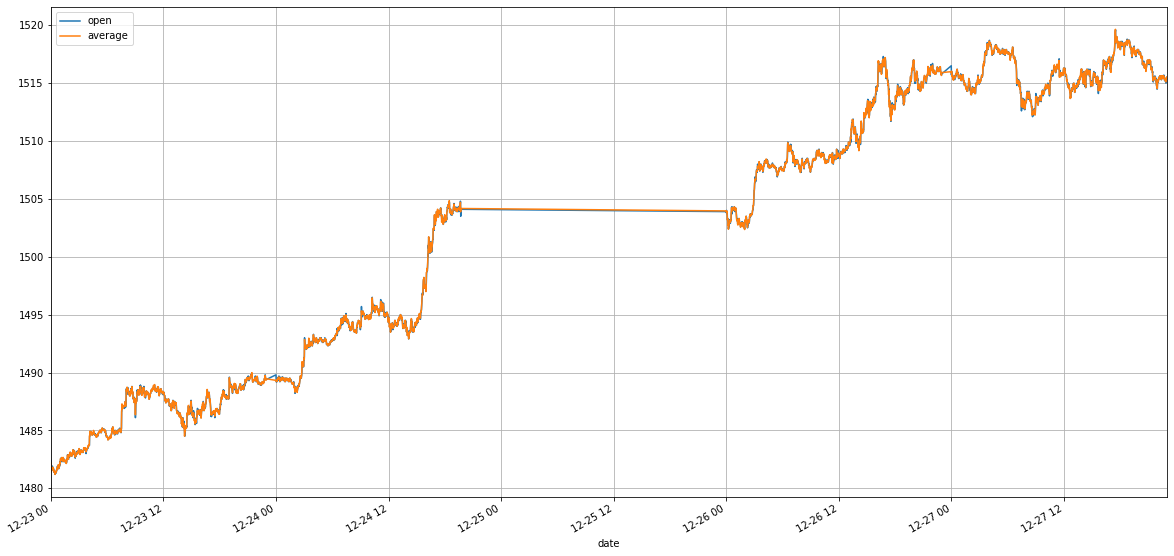

In [8]:
data['gc'].loc['20191222':'20191227'][['open', 'average']].plot(figsize=(20,10), grid=True);

In [29]:
data['cl'].loc['20180101':'20181227'].head(50)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-01-02 00:00:00,60.22,60.23,60.16,60.23,5,60.208,5
2018-01-02 00:01:00,60.21,60.21,60.21,60.21,2,60.210,2
2018-01-02 00:02:00,60.21,60.21,60.21,60.21,0,60.210,0
2018-01-02 00:03:00,60.19,60.19,60.19,60.19,1,60.190,1
2018-01-02 00:04:00,60.21,60.23,60.21,60.23,3,60.220,3
2018-01-02 00:05:00,60.23,60.23,60.23,60.23,2,60.230,2
2018-01-02 00:06:00,60.23,60.24,60.23,60.24,3,60.233,2
2018-01-02 00:07:00,60.24,60.24,60.24,60.24,4,60.240,3
2018-01-02 00:08:00,60.24,60.24,60.22,60.22,2,60.230,2


In [10]:
nq = data['nq']

In [11]:
nq['ema_fast'] = nq['close'].ewm(span=5, min_periods=int(5*.8)).mean()
nq['ema_slow'] = nq['close'].ewm(span=120, min_periods=int(120*.8)).mean()

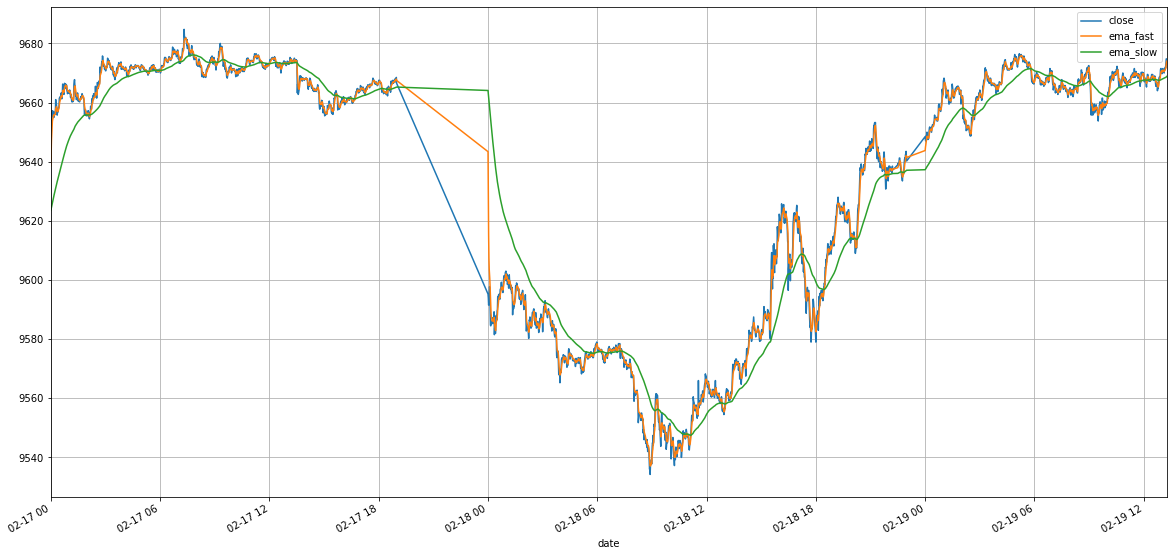

In [12]:
nq[['close', 'ema_fast', 'ema_slow']].loc['20200215':].plot(figsize=(20,10), grid=True);

In [51]:
cl = data['cl']

In [53]:
cl.loc['20190102 09:14':].head(50)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-01-02 09:14:00,44.80,44.82,44.69,44.71,1090,44.753,648
2019-01-02 09:15:00,44.70,44.79,44.69,44.75,888,44.738,507
2019-01-02 09:16:00,44.75,44.75,44.67,44.68,506,44.702,276
2019-01-02 09:17:00,44.68,44.70,44.67,44.69,938,44.678,469
2019-01-02 09:18:00,44.68,44.73,44.67,44.70,498,44.702,300
2019-01-02 09:19:00,44.70,44.72,44.66,44.68,550,44.690,287
2019-01-02 09:20:00,44.68,44.69,44.62,44.63,1117,44.652,662
2019-01-02 09:21:00,44.63,44.63,44.57,44.58,1336,44.598,620
2019-01-02 09:22:00,44.58,44.68,44.56,44.62,1540,44.619,692
